## Классификация текстов

_Построение классификатора текстов_

Данные: https://www.kaggle.com/competitions/nlp-getting-started/data (файл train.csv) - датасет постов из твиттера.

Задача бинарной классификации - определение содержится ли в твите информация о настоящей катастрофе/инциденте или нет.

In [ ]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [ ]:
data = pd.read_csv('07_texts_data.csv')

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

#### 1. Обработка пропусков в данных

In [ ]:
train.isna().any().any()                                                          # there are missing values in train data

True

In [ ]:
train.isna().any()                                                                # missing values are in columns 'keyword' and 'location' in train data

,0
id,False
keyword,True
location,True
text,False
target,False


In [ ]:
test.isna().any().any()                                                           # there are missing values in test data

True

In [ ]:
test.isna().any()                                                                 # missing values are in columns 'keyword' and 'location' in test data

,0
id,False
keyword,True
location,True
text,False
target,False


In [ ]:
train = train.fillna('')                                                          # fill in NaNs in train data with empty string
train.tail()

,id,keyword,location,text,target
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,,just had a panic attack bc I don't have enough...,0
860,1242,blood,,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,,,Officials say a quarantine is in place at an A...,1
7270,10409,whirlwind,Stamford & Cork (& Shropshire),I moved to England five years ago today. What ...,1


In [ ]:
test = test.fillna('')                                                            # fill in NaNs in test data with empty string
test.tail()

,id,keyword,location,text,target
4307,6115,hellfire,"570 Vanderbilt; Brooklyn, NY",New cocktail on the list! El Diablo Mas Verde:...,0
3375,4833,evacuation,USA,Bend Post Office roofers cut gas line prompt e...,1
1710,2466,collided,,Monsoon flooding - Monsoon rains have have hit...,1
4898,6973,massacre,Ireland,Remember this was a massacre of civilians. #Hi...,1
6753,9674,tornado,"Asheville, NC",I liked a @YouTube video http://t.co/itnKBxgWL...,1


#### 2. Исследование данных

1. Распределение классов в обучающей выборке


In [ ]:
train['target'].value_counts()

,count
target,
0,3024
1,2305


In [ ]:
train['target'].value_counts(normalize=True)

,proportion
target,
0,0.567461
1,0.432539


2. 10 наиболее встречающихся значений колонки "keyword", построение ступенчатой диаграммы распределения классов в зависимости от значения keyword

In [ ]:
train['keyword'].value_counts().sort_values(ascending=False)

,count
keyword,
,44
damage,36
siren,35
wreckage,34
fatalities,33
...,...
rescue,16
epicentre,10
radiation%20emergency,7


In [ ]:
popular_keywords = list(train['keyword'].value_counts().sort_values(ascending=False)[1:11].index)
# [1:11] because the most popular value in 'keyword' is NaN
popular_keywords

['damage',
 'siren',
 'wreckage',
 'fatalities',
 'deluge',
 'emergency',
 'harm',
 'twister',
 'nuclear%20reactor',
 'fatality']

In [ ]:
train_popular_keywords = train.loc[train['keyword'].isin(popular_keywords)]
train_popular_keywords

,id,keyword,location,text,target
5130,7317,nuclear%20reactor,"Denver, CO",Nuclear #Solar Power #Japanese #Fukushima Reac...,1
2004,2880,damage,Austin | San Diego,@swb1192 if the NDA is written to damage your ...,0
6135,8753,siren,"Tampa, FL",A demoness with the voice of an angel. Like a ...,0
3165,4543,emergency,,@chowtaxis of Newport a big thanks for the eme...,1
4139,5886,harm,"Massachusetts, USA",@tareksocal I think a lot of celebrities have ...,0
...,...,...,...,...,...
5134,7323,nuclear%20reactor,Paris (France),Magnetic and electrostatic nuclear fusion reac...,0
3645,5194,fatalities,San Francisco,'Motordom' lobbied to change our language arou...,0
3152,4526,emergency,Adelaide,Myanmar floods: Childfund https://t.co/pQHQ4Jn...,1
7513,10746,wreckage,,KUALA LUMPUR (Reuters) - A piece of a wing tha...,1


In [ ]:
order = ['damage', 'siren', 'wreckage', 'fatalities', 'deluge', 'twister', 'fatality', 'harm', 'emergency', 'nuclear%20reactor']

train_popular_keywords = train_popular_keywords.set_index('keyword')
train_popular_keywords = train_popular_keywords.loc[order]

# другой способ задать порядок
# train_popular_keywords['keyword'] = pd.Categorical(train_popular_keywords['keyword'], order)

train_popular_keywords

,id,location,text,target
keyword,,,,
damage,2880,Austin | San Diego,@swb1192 if the NDA is written to damage your ...,0
damage,2854,,Drop it down on a nigga do damage ! ??,0
damage,2884,London/New York,#pt Cross-sectarian protest. Powerful Shia cle...,1
damage,2860,My mind is my world,And here I was complaining about Phoenix Mode ...,0
damage,2858,U.S,#fitness Knee Damage Solution http://t.co/pUMb...,0
...,...,...,...,...
nuclear%20reactor,7312,,@RobertHarding @RepJohnKatko Crazy to use the ...,1
nuclear%20reactor,7318,"New York, New York",Japan's Restart of Nuclear Reactor Fleet Fast ...,1
nuclear%20reactor,7340,"Fort Calhoun, NE",Aug. 5: The Fort Calhoun Nuclear Station is at...,0


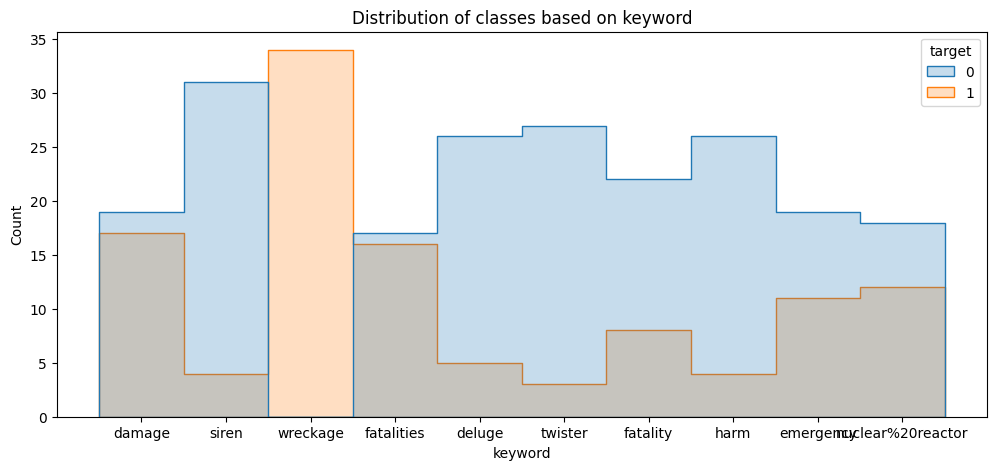

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Distribution of classes based on keyword')
sns.histplot(train_popular_keywords, x='keyword', hue='target', element='step')
plt.show()

**Выводы**:

Можно заметить, что твиты со словом wreckage всегда содержат в себе информацию об инциденте (относятся к классу 1), в остальных случаях видно, что твиты чаще имеют метку 0, чем метку 1, что говорит о том, что информацию о катастрофе они содержат реже. Если в твите есть слово damage или fatalities, то они делятся на два класса почти пополам (хотя к нулевому классу все равно относится чуть больше). Твиты, содержащие слова siren, deluge, twister, fatality, harm вообще редко содержат информацию об инциденте.

#### 3. Объединение текстовых столбцов в один и избавление от столбца с индексом

In [ ]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [ ]:
train_new = train.copy()
train_new['text'] = train_new['keyword'] + ' ' + train_new['location'] + ' ' + train_new['text']

train_new = train_new.drop('keyword', axis=1)
train_new = train_new.drop('location', axis=1)
train_new = train_new.drop('id', axis=1)

In [ ]:
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


In [ ]:
# do the same on test
test_new = test.copy()
test_new['text'] = test_new['keyword'] + ' ' + test_new['location'] + ' ' + test_new['text']

test_new = test_new.drop('keyword', axis=1)
test_new = test_new.drop('location', axis=1)
test_new = test_new.drop('id', axis=1)
test_new.head()

# если взглянуть на тексты, то можно увидеть, что в них есть множество специальных символов, ссылок и прочего мусора

,text,target
2644,destruction So you have a new weapon that can...,1
2227,deluge The f$&amp;@ing things I do for #GISHW...,0
5448,police UK DT @georgegalloway: RT @Galloway4May...,1
132,aftershock Aftershock back to school kick off...,0
6845,"trauma Montgomery County, MD in response to tr...",0


#### 4. Работа с train частью: предобработка данных с помощью CountVectorizer


In [ ]:
texts_train = list(train_new['text'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer() # инстанс класса
X = cnt_vec.fit_transform(texts_train)
X

<5329x18455 sparse matrix of type '<class 'numpy.int64'>'
	with 86671 stored elements in Compressed Sparse Row format>

In [ ]:
X.toarray()
X.shape
# размер матрицы (достаточно большая матрица)

(5329, 18455)

#### 5. Имплементация функции, которая отвечает на вопросы о словаре, который получился в результате построения CountVectorizer:

1. Сколько всего в словаре слов, которые содержат цифры?
2. Сколько всего в словаре слов, которые содержат символы пунктуации?
3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [ ]:
def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    return any(map(str.isdigit, s))

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    def is_punctuation(s: str):
      return s in punctuation
    return any(map(is_punctuation, s))

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return s[0] == '#'

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    return s[0] == '@'

def investigate_vocabulary(vocabulary):
    with_digit = sum(list(map(contains_digit, vocabulary.keys())))
    with_punctuation = sum(list(map(contains_punctuation, vocabulary.keys())))
    hashtags = sum(list(map(is_hashtag, vocabulary.keys())))
    mentions = sum(list(map(is_mention, vocabulary.keys())))
    print('With digit:      ', with_digit
          )
    print('With punctuation:', with_punctuation
          )
    print('Hashtags:        ', hashtags
          )
    print('Mentions:        ', mentions
          )

In [ ]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [ ]:
investigate_vocabulary(cnt_vec.vocabulary_
                       )
# хэштегов и упоминаний в словаре не осталось вообще

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


#### 6. Применение CountVectorizer с TweetTokenizer

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
# для информации о параметрах токенизатора
# help(TweetTokenizer)
tw = TweetTokenizer()
cnt_vec_tw = CountVectorizer(tokenizer=tw.tokenize, token_pattern=None)
# token_pattern используется только при tokenizer=None
X = cnt_vec_tw.fit_transform(texts_train)
X

<5329x19670 sparse matrix of type '<class 'numpy.int64'>'
	with 94563 stored elements in Compressed Sparse Row format>

In [ ]:
investigate_vocabulary(cnt_vec_tw.vocabulary_
                       )

With digit:       3939
With punctuation: 7338
Hashtags:         1470
Mentions:         1679


**Сравнение:**

CountVectorizer с TweetTokenizer сохранил хэштеги и упоминания, а также сохранил намного больше слов с пунктуацией и немного больше слов с цифрами.

#### 7. Имплементация кастомного токенизатора, который:

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer





In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords", quiet=True)

True

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
latin_alphabet = 'abcdefghijklmnopqrstuvwxyz'

In [ ]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    def is_latin_letter(char: str):
      return char in latin_alphabet
    return all(map(is_latin_letter, s))

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    def is_punctuation(char: str):
      return char in punctuation
    return (all(map(is_punctuation, s)) and (')' in s or '(' in s))               # решила просто скобочку тоже считать смайликом

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    def is_latin_letter(char: str):
      return char in latin_alphabet
    return s[0] == '#' and all(map(is_latin_letter, s[1:]))

def custom_tokenizer(s: str) -> List[str]:
    # Кастомный токенайзер
    s = s.lower()
    s = tw.tokenize(s)

    mask = list(map(sum, zip(list(map(contains_only_latin_letters, s)), list(map(is_emoji, s)), list(map(is_hashtag, s)))))
    # маска, определяющая слова из списка, состоящие только из латинских букв или являющиеся смайликом или хэштегом
    s = np.array(s)[np.where(np.array(mask)==1)].tolist()
    # оставляем список из слов, удовлетворяющих условию (маске)

    def is_a_stop_word(w: str):
      return w in stopwords.words('english')                                      # провереяем, является ли слово стоп-словом

    stop_word_mask = list(map(is_a_stop_word, s))
    # применяем маску ко всему списку, чтобы определить, какие слова из списка являются стоп-словами
    s = np.array(s)[np.where(np.array(stop_word_mask)==0)].tolist()
    # оставляем только слова, не удовлетворяющие условию (маске), т.е. те, которые не являются стоп-словами

    def stemming(w: str):
      return stemmer.stem(w)                                                      # делаем стемминг слова

    return list(map(stemming, s))                                                 # делаем стемминг для всех оставшихся слов

In [ ]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Демонстрация работы функции на первых десяти текстах в обучающей выборке.

In [ ]:
list(train_new['text'][:10])

['bridge%20collapse  Ashes 2015: Australia\x89Ûªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0',
 'hail Carol Stream, Illinois GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @bmurph1019 \n@hail_Youtsey . @termn8r13 \n#GoBlue #WrestleOn http://t.co/OasKgki6Qj',
 'police Houston  CNN: Tennessee movie theater shooting suspect killed by police http://t.co/dI8ElZsWNR',
 'rioting  Still rioting in a couple of hours left until I have to be up for class.',
 'wounds Lake Highlands Crack in the path where I wiped out this morning during beach run. Surface wounds on left elbow and right knee. http://t.co/yaqRSximph',
 'airplane%20accident Somewhere Out There Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on... http://t.co/TagZbcXFj0 #MLB',
 "bloody Isolated City In World Perth 'I came to kill Indians...for FUN': Video of smirking and remorseless Pakistani killer shows him boas

In [ ]:
train_new['text'][:10].apply(custom_tokenizer).tolist()

[['bridg',
  'ash',
  'australia',
  'collaps',
  'trent',
  'bridg',
  'among',
  'worst',
  'histori',
  'england',
  'bundl',
  'australia'],
 ['hail',
  'carol',
  'stream',
  'illinoi',
  'great',
  'michigan',
  'techniqu',
  'camp',
  'thank',
  '#goblu',
  '#wrestleon'],
 ['polic',
  'houston',
  'cnn',
  'tennesse',
  'movi',
  'theater',
  'shoot',
  'suspect',
  'kill',
  'polic'],
 ['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class'],
 ['wound',
  'lake',
  'highland',
  'crack',
  'path',
  'wipe',
  'morn',
  'beach',
  'run',
  'surfac',
  'wound',
  'left',
  'elbow',
  'right',
  'knee'],
 ['airplan',
  'somewher',
  'expert',
  'franc',
  'begin',
  'examin',
  'airplan',
  'debri',
  'found',
  'reunion',
  'island',
  'french',
  'air',
  'accid',
  'expert',
  '#mlb'],
 ['bloodi',
  'isol',
  'citi',
  'world',
  'perth',
  'came',
  'kill',
  'indian',
  'fun',
  'video',
  'smirk',
  'remorseless',
  'pakistani',
  'killer',
  'show',
  'boast'],
 ['burn',

#### 8. Решение задачи классификации (CountVectorizer)

1. Применение CountVectorizer с реализованным токенизатором к обучающим и тестовым выборкам.


In [ ]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, token_pattern=None
                             )
bow_train = vectorizer.fit_transform(texts_train)
bow_train

<5329x10482 sparse matrix of type '<class 'numpy.int64'>'
	with 50974 stored elements in Compressed Sparse Row format>

In [ ]:
texts_test = list(test_new['text'])

In [ ]:
bow_test = vectorizer.transform(texts_test)
bow_test

<2284x10482 sparse matrix of type '<class 'numpy.int64'>'
	with 19288 stored elements in Compressed Sparse Row format>

2. Обучение LogisticRegression на полученных признаках.


In [ ]:
y_train = train_new['target']

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

3. Подсчет метрики f1-score на тестовых данных.

In [ ]:
y_test = test_new['target']

In [ ]:
from sklearn.metrics import f1_score

y_pred = clf.predict(bow_test)
print(f"F1 score: {f1_score(y_test, y_pred):.2f}")

F1 score: 0.75


#### 9. Решение задачи классификации (TfidfVectorizer)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)
bow_train_tfidf = tfidf_vec.fit_transform(texts_train)
bow_test_tfidf = tfidf_vec.transform(texts_test)

clf_tfidf = LogisticRegression(max_iter=200, random_state=42)
clf_tfidf.fit(bow_train_tfidf, y_train)

y_pred_tfidf = clf_tfidf.predict(bow_test_tfidf)
print(f"F1 score: {f1_score(y_test, y_pred_tfidf):.2f}")

F1 score: 0.74


In [ ]:
bow_train_tfidf.toarray()
bow_train_tfidf.shape

(5329, 10482)

Качество немного ухудшилось.

**Уменьшение размера матрицы за счет отбрасывания значений df близких к единице. Скорее всего, такие слова не несут много информации о категории, т.к. встречаются достаточно часто.**


In [ ]:
tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None, max_df=0.9)
bow_train_tfidf = tfidf_vec.fit_transform(texts_train)
bow_test_tfidf = tfidf_vec.transform(texts_test)

clf_tfidf = LogisticRegression(max_iter=200, random_state=42)
clf_tfidf.fit(bow_train_tfidf, y_train)

y_pred_tfidf = clf_tfidf.predict(bow_test_tfidf)
print(f"F1 score: {f1_score(y_test, y_pred_tfidf):.2f}")

F1 score: 0.74


In [ ]:
bow_train_tfidf.toarray()
bow_train_tfidf.shape

(5329, 10482)

Ни качество, ни размер матрицы не изменились, возможно потому, что слова, которые встречаются достаточно часто - это стоп-слова, которые уже были удалены кастомным токенизатором.

**Уменьшение размера матрицы удалением слов со слишком маленьким df.**

In [ ]:
tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None, min_df=2)
bow_train_tfidf = tfidf_vec.fit_transform(texts_train)
bow_test_tfidf = tfidf_vec.transform(texts_test)

clf_tfidf = LogisticRegression(max_iter=200, random_state=42)
clf_tfidf.fit(bow_train_tfidf, y_train)

y_pred_tfidf = clf_tfidf.predict(bow_test_tfidf)
print(f"F1 score: {f1_score(y_test, y_pred_tfidf):.2f}")

F1 score: 0.75


In [ ]:
bow_train_tfidf.toarray()
bow_train_tfidf.shape

(5329, 4523)

Теперь изменились и размер матрицы, и качество. Удалось добиться улучшения качества, оно стало таким же, как при CountVectorizer.

#### 10. Решение задачи классификации (HashingVectorizer)

Уменьшение количества признаков при помощи hashing trick

(случайно группирует признаки и складывает их, потом удаляет исходные признаки;

в итоге все признаки - это просто суммы исходных;

при таком подходе не нужно хранить словарь token->index).

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

hash_vec = HashingVectorizer(tokenizer=custom_tokenizer, token_pattern=None, n_features=5000)
bow_train_hash = hash_vec.fit_transform(texts_train)
bow_test_hash = hash_vec.transform(texts_test)

clf_hash = LogisticRegression(max_iter=200, random_state=42)
clf_hash.fit(bow_train_hash, y_train)

y_pred_hash = clf_hash.predict(bow_test_hash)
print(f"F1 score: {f1_score(y_test, y_pred_hash):.2f}")

F1 score: 0.72


Самый высокий результат (0.75) показали два подхода - CountVectorizer и TfidfVectorizer с min_df=2.